# Численное дифференциирование и погрешности

## План

1. Численное дифференциирование
2. Погрешность метода
3. Погрешность машинного округления
4. Погрешность данных. Шум.
5. Задачи

## 1. Численное дифференциирование

### _Постановка задачи для 1-ой производной_

Пусть таблично задана некоторая функция $u(x)$:

$$
\begin{array}{|l|l|l|l|l|l|l|l|}
\hline u(x) & u\left(x_0\right) & u_1 & u_2 & \cdots & u_j & \cdots & u_J \\
\hline x & x_0 & x_1 & x_2 & \cdots & x_j & \cdots & x_J \\
\hline
\end{array}
$$

Как раз в такой форме задана любая функция в компьютере (массив "иксов" и массив "игреков"). Отметим, что разбиение по "иксам" может быть как равномерным, так и неравномерным - всё зависит от конкретной табдично заданной функции.

Хотим вычислить её производную в каждой точке $x_j$. Вспомним определение из матанализа:

$$u'\left(x_j\right)=\lim _{\Delta x \rightarrow 0} \frac{u\left(x_j+\Delta x\right)-u\left(x_j\right)}{\Delta x}$$

Но ведь на компьютере $\Delta x$ не может стремится к нулю, т.к. функция по сути дискретная, - придётся считать приближённо, с помощью аппроксимации производной путём использования __конечно-разностных схем__. Некоторые примеры:

a) $u_j^{(1)}=\frac{u_j-u_{j-1}}{x_j-x_{j-1}}=\frac{u_j-u_{j-1}}{h}$

b) $u_j^{(1)}=\frac{u_{j+1}-u_j}{x_{j+1}-x_j}=\frac{u_{j+1}-u_j}{h}$

c) $u_j^{(1)}=\frac{u_{j+1} - u_{j-1}}{x_{j+1}-x_{j-1}}=\frac{u_{j+1}-u_{j-1}}{2 h}$

Подчеркнём разницу между обозначениями $u'$ и $u^{(1)}$. $u'$ - это истинная (математическая) производная, а $u^{(1)}$ - это лишь аппроксимация (наше приблежение).

### _Порядок аппроксимации_

Чем же отличаются данные схемы? Оказывается, точностью. Но сначала вспомним про ряд Тейлора с остаточным членом в форме Лагранжа и Пеано:

$$
\begin{aligned}
&u\left(x_j+\Delta x\right)=u\left(x_j\right)+u^{\prime}\left(x_j\right) \cdot \Delta x+u^{\prime \prime}\left(x_j\right) \frac{\Delta x^2}{2 !}
+u^{\prime \prime \prime}\left(x_j\right) \frac{\Delta x^3}{3 !}+\cdots+u^{(n)}\left(x_i\right) \frac{\Delta x^n}{n !}+\frac{u^{(n+1)}(\xi)}{(n+1) !} \Delta x^{n+1}=\sum_{k=0}^n \frac{u^{(k)}\left(x_j\right)}{k !} \Delta x^k+O\left(\Delta x^{n+1}\right)
\end{aligned}
$$

Подставляя это разложение в наши примеры, посмотрим на их "точность":

---

a) $u_j^{(1)}=\frac{u_j-u_{j-1}}{x_j-x_{j-1}}=\frac{u_j-u_{j-1}}{h}$

$
u_{j-1}=u\left(x_{j-1}\right)=u(x_j - h)=u_j-h u_j^{\prime}+\frac{h^2}{2} u_j^{\prime \prime}-\frac{h^3}{6} u_j^{\prime \prime \prime}+O\left(h^4\right)
$

$u_j^{(1)}=\frac{u_j-u_{j-1}}{h}=\frac{u_j-(u_j-h u_j^{\prime}+\frac{h^2}{2} u_j^{\prime \prime}-\frac{h^3}{6} u_j^{\prime \prime \prime}+O\left(h^4\right))}{h} = u_j^{\prime}-\frac{h u_j^{\prime \prime}}{2}+\frac{h^2}{6} u_j^{\prime \prime \prime} +o(h^3) \approx u_j^{\prime}+O(h)$

Видим, что при $h \rightarrow 0$ наша аппроксимация стремится к истинной производной. В данном случае эта разностная схема имеет __1-ый порядок аппроксимации__, т.к. ошибка пропорциональна первой степени $h$.

---

b) $u_j^{(1)}=\frac{u_{j+1}-u_j}{x_{j+1}-x_j}=\frac{u_{j+1}-u_j}{h}$

$
u_{j+1}=u\left(x_{j+1}\right)=u(x_j + h)=u_j+h u_j^{\prime}+\frac{h^2}{2} u_j^{\prime \prime}+\frac{h^3}{6} u_j^{\prime \prime \prime}+O\left(h^4\right)
$

$u_j^{(1)}=\frac{u_{j+1}-u_j}{h}=\frac{(u_j+h u_j^{\prime}+\frac{h^2}{2} u_j^{\prime \prime}+\frac{h^3}{6} u_j^{\prime \prime \prime}+O\left(h^4\right)) - u_j}{h} = u_j^{\prime}+\frac{h u_j^{\prime \prime}}{2}+\frac{h^2}{6} u_j^{\prime \prime \prime} +O(h^3) \approx u_j^{\prime}+O(h)$

Опять получился 1-ый порядок аппроксимации.

---

c) $u_j^{(1)}=\frac{u_{j+1} - u_{j-1}}{x_{j+1}-x_{j-1}}=\frac{u_{j+1}-u_{j-1}}{2 h}$

$
u_{j+1}=u\left(x_{j+1}\right)=u(x_j + h)=u_j+h u_j^{\prime}+\frac{h^2}{2} u_j^{\prime \prime}+\frac{h^3}{6} u_j^{\prime \prime \prime}+O\left(h^4\right)
$

$
u_{j-1}=u\left(x_{j-1}\right)=u(x_j - h)=u_j-h u_j^{\prime}+\frac{h^2}{2} u_j^{\prime \prime}-\frac{h^3}{6} u_j^{\prime \prime \prime}+O\left(h^4\right)
$

$u_j^{(1)}=\frac{u_{j+1}-u_{j-1}}{2h}=u_j^{\prime}+\frac{h^2}{6} u_j^{\prime \prime \prime}+o(h^2)=u_j^{\prime}+O(h^2)$

Получился __2-ой порядок аппроксимации__ - то есть эта разностная аппроксимация на порядок точнее двух предыдущих. К примеру, без учёта констант перед $h$, если в a) и b) ошибка была бы $10^{-3}$, то в с) на том же наборе данных мы бы имели ошибку $10^{-6}$.

---

Итого мы поняли, что задачу приближённого нахождения производной (аппроксимации производной) можно решать с помощью конечно-разностных схем. Разные схемы могут иметь разную точность. Обобщим задачу на случай производной произвольной степени.

### _Постановка задачи для k-ой производной_

Пусть таблично задана некоторая функция $u(x)$:

$$
\begin{array}{|l|l|l|l|l|l|l|l|}
\hline u(x) & u\left(x_0\right) & u_1 & u_2 & \cdots & u_* & \cdots & u_J \\
\hline x & x_0 & x_1 & x_2 & \cdots & x_* & \cdots & x_J \\
\hline
\end{array}
$$

Хотим приближенно найти производную $k$-го порядка в точке $x_*$. Будем искать решение в виде конечно-разностной схемы:


$$u^{(k)}\left(x_*\right)=u_*^{(k)}=\frac{\overset{m}{\underset{j \,=-l}{\sum}} \alpha_j \cdot u\left(x_*+\Delta x_j\right)}{h^k}$$

Здесь $\alpha_j$ - некоторые числовые коэффициенты, которые определяют вид конечно-разностной схемы. Как же их найти?

__Алгоритм составления разностной схемы__

1. Фиксировать $l$ и $m$ исходя из п.3 ниже.
2. Разложить $u\left(x_*+\Delta x_j\right)$ в ряд Тейлора в точке $x_*$. Привести множители перед производными.
3. Составить систему линейных уравнений на $\alpha_j$ исходя из
- зануления скобок перед производными порядка меньше k
- равенства скобки единице перед искомой k-ой производной
- занулению скобок перед некоторым количеством производных порядка выше k для увеличения точности.
4. Решить эту систему аналитически $\rightarrow$ найти $\alpha_j$ $\rightarrow$ схема задана.

Если же в нашей функции нет фиксированного шага по "искам" $h$, то меняется лишь изначальная формула, откуда $h$ пропадает из знаменателя, и остаётся только числитель. В остальном алгоритм такой-же. Более подробно см. лекцию С1 https://vk.com/video/@club101906738?z=video-101906738_456239046%2Fclub101906738%2Fpl_-101906738_-2.

Вообще, все эти задачи для различных $k, l, m$ давно решены за нас. Достаточно загуглить "конечно-разностные схемы".

### _k-ая производная функция нескольких переменных_

В целом "дух", алгоритм и понятие порядка аппроксимации абсолютно такие же как и в предыдущих пунктах, только теперь необходимо рассматривать различные шаги $h_1, h_2, ...$ по разным осям. Также в рядах Тейлора появятся перекрестные слагаемые. За более подробным описанием см. лекцию С1 https://vk.com/video/@club101906738?z=video-101906738_456239046%2Fclub101906738%2Fpl_-101906738_-2

## 2. Погрешность метода

На основе презентации Ивана Цыбулина, Ярослава Холодова.

Многие методы вычислительной математики являются приближенными, то есть позволяют получить ответ с заданной точностью. Крайне важно уметь определять погрешность, обусловленную использованием приближенного метода. Такая погрешность называется **ошибкой метода**. По сути это есть разница между истинным (математическим) значением и тем, который мы получаем при вычислении.

Оценим погрешность метода для некоторых конечно-разностных схем.

---

- Конечно-разностная схема первого порядка

$$f_j^{(1)}=\frac{f_{j+1}-f_j}{x_{j+1}-x_j}=\frac{f_{j+1}-f_j}{h}$$

Обозначим $x_j = x_0$. Тогда погрешность метода будет равна

$$
\varepsilon_{\text{method}}=\left|f'(x_0) - \frac{f(x_0 + h) - f(x_0)}{h}\right|
$$

Воспользуемся формулой Тейлора с остаточным членом в форме Лагранжа:

$$
f(x_0 + h) = f(x_0) + f'(x_0) h + \frac{f''(\xi)}{2} h^2, \;\; \xi \in [x_0, x_0 + h]\\
\left|f'(x_0) - \frac{f(x_0 + h) - f(x_0)}{h}\right| = \frac{|f''(\xi)|h}{2}
$$

Пусть известно, что $|f''(\xi)| \leq M_2$ - верхняя оценка второй производной. Тогда ошибку (погрешность) метода можно оценить как

$$
\varepsilon_\text{method}=\left|f'(x_0) - \frac{f(x_0 + h) - f(x_0)}{h}\right| \leqslant  \frac{M_2 h}{2}
$$

Итого, максимальная погрешности метода

$$\varepsilon_\text{method} = \frac{M_2 h}{2}$$

Отсюда также видно, что данная конечно-разностная схема имеет 1-ый порядок аппроксимации.

---

- Конечно-разностная схема второго порядка

$$
f^{(1)}(x) = \frac{f(x + h) - f(x - h)}{2h}.
$$

Пользуясь такими же разложениями

$$
f(x_0 \pm h) = f(x_0) \pm f'(x_0) h + \frac{f''(x_0)}{2} h^2 \pm \frac{f'''(\xi_{1,2})}{6} h^3,\\
\xi_1 \in [x_0 - h, x_0], \xi_2 \in [x_0, x_0 + h],
$$

заключаем, что

$$
\varepsilon_\text{method}=\left|f'(x_0) - \frac{f(x_0 + h) - f(x_0 - h)}{2h}\right| = \frac{|f'''(\xi_2) + f'''(\xi_1)|h^2}{12},\\
\left|f'(x_0) - \frac{f(x_0 + h) - f(x_0 - h)}{2h}\right| \leqslant  \frac{M_3 h^2}{6}, \qquad M_3 = \max |f'''(\xi)|
$$

Опять же видим, что данный метод имеет *второй порядок*, так как $\varepsilon_\text{method} = O(h^2)$.

---

- Приближённое вычисление функции

Погрешность метода вводится не только для разностных схем, но вообще для любого алгоритма, выполняемого на компьютере. К примеру, расчет функции $f(x)=\sin x$ в некоторой точке через её ряд Тейлора.

Для функции $\sin x$ ряд Тейлора в окрестности точки $x=0$ выглядит следующим образом
$$
\sin x=x-\frac{x^3}{6}+\frac{x^5}{120}+\cdots=\sum_{k=0}^{\infty}(-1)^k \frac{x^{2 k+1}}{(2 k+1) !}
$$

Радиус сходимости у такого ряда бесконечный, так что можем им пользоваться для нахождения значения функции в любой точке. Но как суммировать бесконечный ряд на компьютере?

Естественно, никак нельзя. Придётся ограничиться несколькими членами этого ряда, а остаток и будет погрешностью метода в данном случае.

$$\sin x=\underbrace{\sum_{k=0}^n(-1)^k \frac{x^{2 k+1}}{(2 k+1) !}}_{S_n}+\frac{x^{2 n+2}}{(2 n+2) !} \sin ^{(2 n+2)} \xi, \quad \xi \in[0, x]$$

Как раз $S_n$ мы и вычисляем в нашей программе. Погрешность от истинного же значения будет

$$\varepsilon_{\text {method }} \equiv\left|\frac{x^{2 n+2}}{(2 n+2) !} \sin ^{(2 n+2)} \xi\right| \leqslant \frac{x^{2 n+2}}{(2 n+2) !} M_{2 n+2}$$

Так как все производные функции $\sin x$ ограничены по модулю единицей, $M_{2 n+2}=1$ и

$$
\varepsilon_{\text {method}}=\frac{x^{2 n+2}}{(2 n+2) !}
$$

При стремлении $n \rightarrow \infty$ ошибка метода начиная с $n=n_0>x / 2$ монотонно стремится к нулю благодаря факторилу в знаменателе.

## 3. Погрешность машинного округления

### Представление чисел в памяти компьютера

Действительные числа в машинном представлении приходится округлять до $K$ цифр после запятой. При этом число $x$, имеющее машинное представление $X$, находится где-то в диапазоне
$$
x \in \left[X - \Delta X, X + \Delta X\right]
$$

Величина $\Delta X$ назвается **абсолютной погрешностью** представления $x$.

**Относительная погрешность** представления чисел в арифметике с плавающей точкой зависит от количества используемых цифр $K$, но не от самого числа $x$:

$$
\frac{\Delta X}{|X|} \leqslant \delta = 2^{-(K+1)}
$$

Стоит отметить, что двойка здесь потому, что числа в компьютере хранятся именно в двоичной системе счисления.

Стандартом IEEE 754 определяются несколько форматов представления чисел в компьютере. Самыми распространенными являются
 * одинарная точность, single precision (`float` в C). Имеет $K = 23$ и обеспечивает относительную точность $\delta = 2^{-24} \approx 5.96 \cdot 10^{-8}$
 * двойная точность, double precision (`double` в C). Имеет $K = 52$ и обеспечивает относительную точность $\delta = 2^{-53} \approx 1.11 \cdot 10^{-16}$

Таким образом, погрешность округления произвольного числа $A$ в компьютере можно определить, зная его тип (float или double), из которого мы получаем $\delta$. Тогда погрешность округления будет $\varepsilon_\text{round} = \delta \cdot A$.

### Накопление ошибок округления
Cуммируя величину $\displaystyle S_n = \sum_{k=0}^{n-1} a_n$
в машинной арифметике, мы на самом деле суммируем *округленные* величины. Каждое слагаемое $a_n$ представлено с абсолютной погрешностью $\Delta a_n \leqslant |a_n| \cdot \delta$, где $\delta$ — относительная ошибка округления.

Так как при суммировании чисел их абсолюная погрешность суммируется, при вычислении $S_n$ накопится ошибка
$$
\Delta S_n \leqslant \varepsilon_\text{round} = \sum_{k=0}^{n-1} |a_n| \cdot \delta = \delta \cdot \sum_{k=0}^{n-1} |a_n|.
$$

### Таблица погрешностей операций
Погрешности округления для основных операций выглядят следующим образом (Здесь $\varepsilon_\text{round}=\Delta$)

$\Delta(a \pm  b)=\Delta a+\Delta b$

$\Delta\left(a^m\right)=m \cdot a^{m-1} \Delta a$

$\Delta(a \cdot b)=a \cdot b[\delta(a)+\delta(b)]=b \Delta a+a \Delta b$

$\Delta(a / b)=\frac{a}{b}[\delta(a)+\delta(b)]=\frac{b \Delta a+a \Delta b}{b^2}$

Источник: "Е.Г. Агапова - Вычислительная математика"

### Пример - погрешность округлений конечно-разностной схемы

Вспомним, что функция $f(x)$ вычисляется с погрешностью $\Delta f$. При вычислении
$$f^{(1)}(x_0) \approx \frac{f(x_0 + h) - f(x_0)}{h}$$
из-за приближенных значений $f(x_0 + h)$, $f(x_0)$ и $h$ появляется ошибка округления


$$
\varepsilon_\text{round} = \frac{ 2 h \Delta f + (f(x_0 + h) - f(x_0)) \Delta h}{h^2} \approx \frac{2\Delta f}{h}
$$
соответственно. Эта ошибка при уменьшении $h$ *растет* как $O(h^{-1})$.

Отсюда понимаем, что не имеет смысла уменьшать $h$ до нуля, т.к. это лишь приведёт к увеличению ошибки округления, которая может "съесть" весь выйгрыш от уменьшения ошибки метода. Отсюда следует существование некоторого оптимального шага, при котором суммарная погрешность минимизируется.

### Оптимальный шаг дифференцирования

При дифференцировании функции имеются два основных источника погрешности
 * Ошибка метода — уменьшается при уменьшении $h$
 * Ошибка вычислений — растет при уменьшении $h$

Поскольку характер роста ошибок различный, существует некоторое значение $h^*$, при котором ошибка минимальна. Рассмотим __полную ошибку__

$$
\varepsilon_\text{total} = \varepsilon_\text{method} + \varepsilon_\text{round}
$$

как функцию от $h$ и найдем минимум.

---

- Разностная схема первого порядка аппроксимации

Продифферецируем полную ошибку

$$
\varepsilon_{\text{total}}(h) = \frac{M_2h}{2} + \frac{2\Delta f}{h}\\
$$

по $h$:

$$
0 = \varepsilon_\text{total}'(h^*) = \frac{M_2}{2} - \frac{2\Delta f}{{h^*}^2}\\h^* = 2\sqrt\frac{\Delta f}{M_2}
$$

Для функции $f(x) = \sin x$ оценки производных $M_2 = M_3 = 1$. Также примем $\Delta f = 10^{-16}$ - аля работаем с типом double и $sin x$ можно максимально оценить единицей. Тогда

$$
h^* = 2 \cdot 10^{-8}, \qquad \varepsilon_{\text{total}}^* = 2\cdot 10^{-8}
$$

---

- Разностная схема второго порядка аппроксимации

Проделав то же самое для формулы дифференцирования второго порядка, получаем

$$
\varepsilon_{\text{total}}(h) = \frac{M_3h^2}{6} + \frac{2\Delta f}{2h}\\
$$

по $h$:

$$
0 = \varepsilon_\text{total}'(h^*) = \frac{M_3h^*}{3} - \frac{\Delta f}{{h^*}^2}\\h^* = \sqrt[3]\frac{3\Delta f}{M_3}
$$

При тех же значениях $M_2, M_3$ и $\Delta f$ получаем

$$
h^* \approx 6.69 \cdot 10^{-6}, \qquad \varepsilon_{\text{total}}^* \approx 2.24\cdot 10^{-11}
$$

Т.е. оптимально брать меньший шаг и при этом будем получать меньшую погрешность!

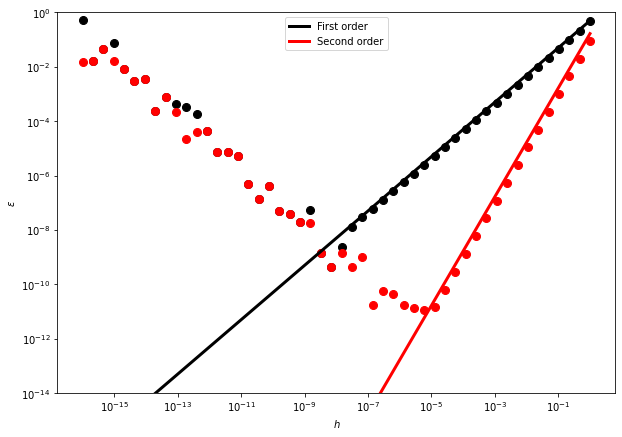

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def diff1(f, x0, h):
    return (f(x0 + h) - f(x0)) / h

def diff2(f, x0, h):
    return (f(x0 + h) - f(x0 - h)) / (2 * h)

hs = np.logspace(-16, 0, num=50) # h = 1e-16 ... 1
errs1 = []
errs2 = []

for h in hs:
    errs1.append(abs(diff1(np.sin, 1, h) - np.cos(1)))
    errs2.append(abs(diff2(np.sin, 1, h) - np.cos(1)))

M2 = M3 = 1
plt.figure(figsize=(10, 7))
plt.loglog(hs, errs1, 'k.', ms=16)
plt.loglog(hs, errs2, 'r.', ms=16)
plt.loglog(hs, M2 * hs / 2, 'k-', label='First order', lw=3)
plt.loglog(hs, M3 * hs**2 / 6, 'r-', label='Second order', lw=3)
plt.ylim(1e-14, 1)
plt.xlabel('$h$')
plt.ylabel('$\\varepsilon$')
plt.legend(loc='upper center')
plt.show()

## 4. Погрешность данных. Шум.

Как мы знаем, данные, которые нам необходимо обрабатывать, также имеют свои погрешности помимо округления в памяти компьютера. К примеру, пусть у нас есть функция

$$
f(x) = sin(x)*cos(x) + 0.25*x + \epsilon
$$

где $\epsilon \sim \mathcal{N}(0, 0.005)$

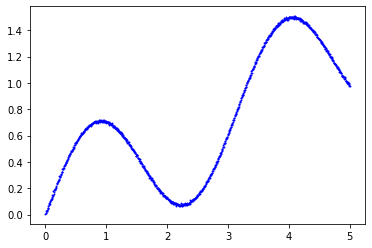

In [ ]:
x = np.linspace(0, 5, 1000).reshape((-1, 1))
noise = np.random.normal(0, 0.005, size=x.shape)
y = np.sin(x)*np.cos(x) + 0.25*x + noise

plt.scatter(x, y, c = 'b', s= 0.8)
#plt.plot(x, y - noise, c = 'r', linewidth= 4)

Пусть хотим посчитать её производную численно в каждой точке. Применим рассказанную выше теорию и воспользуемся разностной схемой второго порядка точности на всех "внутренних" точках, и первого порядка на "крайних" и сравним с "истинной производной"

$$
f(x) = -sin^2(x) + cos^2(x) + 0.25
$$

In [ ]:
h = x[1, 0] - x[0, 0]
h

0.005005005005005005

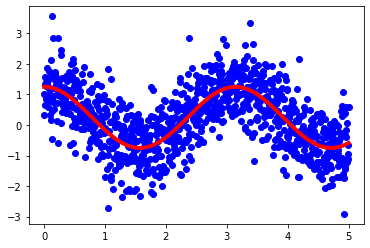

In [ ]:
def diff2(y, h):

    y_diff = np.copy(y)

    y_diff[1:-1, 0] = (y[2:, 0] - y[:-2, 0])/2/h
    y_diff[0, 0] = (y[1, 0] - y[0, 0])/h
    y_diff[-1, 0] = (y[-1, 0] - y[-2, 0])/h

    return y_diff

y_diff_true = -np.sin(x)**2 + np.cos(x)**2 + 0.25

plt.plot(x, y_diff_true, linewidth= 4, c="r")
plt.scatter(x, diff2(y, h), c = 'b')
#plt.plot(x, y_diff)

Не очень как-то. Результат был бы ещё хуже, если бы мы воспользовались конечной разностью первого порядка везде, а не только на крайних точках.

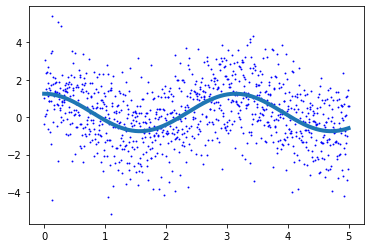

In [ ]:
def diff1(y, h):
    y_diff = np.copy(y)

    y_diff[:-1, 0] = (y[1:, 0] - y[0:-1, 0])/h
    y_diff[-1, 0] = (y[-1, 0] - y[-2, 0])/h

    return y_diff

plt.plot(x, y_diff_true, linewidth= 4)
plt.scatter(x, diff1(y, h), c = 'b', s= 0.8)

Видим, что даже казалось бы ничтожная погрешность изначальных данных приводит к катастрофическому изменению численно определённой производной.

Как быть??

Ответ - фитить изначальные данные, чтобы избавиться от шума. Например, линейной регрессией, если точек не очень много. В духе прошлого семинара, будем фитить многочленами.

In [ ]:
k = 10

# Составляем матрицу объекты-признаки
X = x**([i for i in range(k+1)])
np.linalg.matrix_rank(X)

11

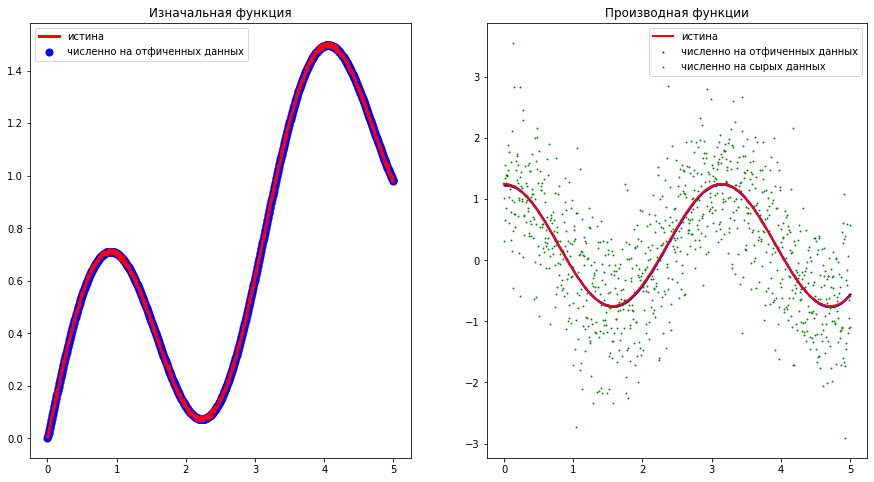

In [ ]:
# C помощью sklearn решаем задачу линейной регрессии - он это сделает гораздо точнее и быстрее, чем мы с помощью numpy

from sklearn import linear_model as lm

lin_reg = lm.LinearRegression(fit_intercept=False)
lin_reg.fit(X, y) # Подаём на вход матрицу объекты-признаки а не иксы!11!!11!!1!

y_predicted = lin_reg.predict(x**([i for i in range(k+1)])) # Не забываем, что для предсказания модели нужны все признаки в
                                                            # матрицы объекты-признаки. Написал здесь её явный расчет, чтобы
                                                            # было видно, что можем заменить иксы

#Смотрим теперь на производную

fig, ax = plt.subplots(1, 2, figsize=(15, 8))

ax[0].plot(x, y, linewidth= 3, c = 'r', label= "истина")
ax[0].scatter(x, y_predicted, c = 'b', s= 50, label= "численно на отфиченных данных")
ax[0].legend()
ax[0].title.set_text('Изначальная функция')

ax[1].plot(x, y_diff_true, linewidth= 2, c = 'r', label= "истина")
ax[1].scatter(x, diff2(y_predicted, h), c = 'b', s= 0.8, label= "численно на отфиченных данных")
ax[1].scatter(x, diff2(y, h), c = 'g', s= 0.8, label= "численно на сырых данных")
ax[1].legend()
ax[1].title.set_text('Производная функции')

plt.show()

Отлично! Смогли избавиться от шума и хорошо численно посчитать производную!

Возникает вопрос, какой порядок выбрать?

Слишком маленький порядок не может хорошо приблизить данные, а слишком большой приближает данные вместе с шумом. В машинном обучении эта проблема называется компромиссом между сдвигом и дисперсией (bias-variance tradeoff). Переход между данной границей хорошо заметен на графике loss в зависимости от степени многочлена.

loss считаем на изначальных данных (на выборке test зашумленных данных, как в жизни) и на производной (на всей выборке, относительно значений без шума). Проверим, что наилучший фит изначальной функции приводит к тому, что численно посчитанная производная отфиченных данных будет наилучшей аппроксимацией истинной производной.

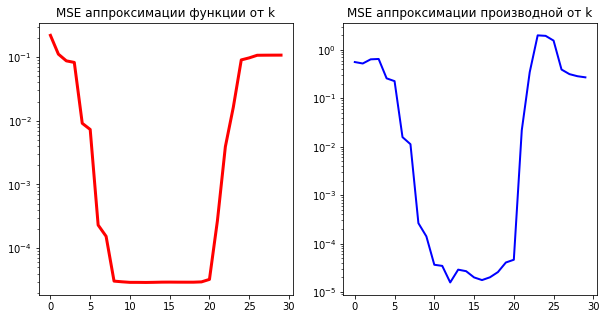

Видим, что нет особого смысла выбирать k>10, т.к. ошибка меняется незначительно.


In [ ]:
from sklearn import metrics # лень опять реализовывать MSE Loss. Возьмём его отсюда.
from sklearn import model_selection as ms

x_train, x_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.2) # Разбиваем выборку



def make_model(k, x_train, y_train):

    in_reg = lm.LinearRegression(fit_intercept=False)
    lin_reg.fit(x_train**([i for i in range(k+1)]), y_train) # Обучаем на трэйне

    return lin_reg


ks = [k for k in range(30)]
losses_func = []
losses_diff = []


for k in ks:

    model = make_model(k, x_train, y_train)

    y_test_predicted = model.predict(x_test**([i for i in range(k+1)]))
    losses_func.append(metrics.mean_squared_error(y_test, y_test_predicted))

    y_all_predicted = model.predict(x**([i for i in range(k+1)]))
    losses_diff.append(metrics.mean_squared_error(y_diff_true, diff2(y_all_predicted, h)))



fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].semilogy(ks, losses_func, linewidth= 3, c = 'r')
ax[0].title.set_text('MSE аппроксимации функции от k')

ax[1].semilogy(ks, losses_diff, linewidth= 2, c = 'b')
ax[1].title.set_text('MSE аппроксимации производной от k')

plt.show()

print("Видим, что нет особого смысла выбирать k>10, т.к. ошибка меняется незначительно.")

Таким образом, мы научились фильтровать шум в данных, чтобы свести к минимуму случайную погрешность данных.

Отдельно отметим, что второй график "в реальности" не получить, т.к. нам просто не будет известно аналитическая форма производной. Так что ориентируемся всё равно по первому графику

## Примеры

1. Полагая, что написанные числа верны только до последней значащей цифры, найти приближенные значения следующих величин:

a) $0,53784 \cdot 42,46578$;

б) $0,234+4,3758+15,372 \cdot 0,3762$;


2. Найдите погрешность метода и неустранимую погрешность при вычислениях по этой формуле. Найдите оптимальный шаг численного дифференцирования и минимально возможную ошибку.


$$
f^{(2)}(x)=\frac{f(x+h)-2 f(x)+f(x-h)}{h^2}
$$

In [ ]:
# Будем работать в библиотеке аналитических вычислений sympy
#!pip install sympy
import sympy as smp

x = smp.symbols('x')
f = smp.symbols('f', cls = smp.Function)(x)

f

f(x)

In [ ]:
f.series(x, 0, 5)

f(0) + x*Subs(Derivative(f(xi), xi), xi, 0) + x**2*Subs(Derivative(f(xi), (xi, 2)), xi, 0)/2 + x**3*Subs(Derivative(f(xi), (xi, 3)), xi, 0)/6 + x**4*Subs(Derivative(f(xi), (xi, 4)), xi, 0)/24 + O(x**5)

In [ ]:
h = smp.symbols('h')

f_plus_h = smp.symbols('f', cls = smp.Function)(x+h)

f_plus_h.series(h, 0, 5)

f(x) + h*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x) + h**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, x)/2 + h**3*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, x)/6 + h**4*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, x)/24 + O(h**5)

In [ ]:
f_minus_h = smp.symbols('f', cls = smp.Function)(x-h)

f_minus_h.series(h, 0, 5)

f(x) - h*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x) + h**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, x)/2 - h**3*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, x)/6 + h**4*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, x)/24 + O(h**5)

In [ ]:
chislitel = f_plus_h.series(h, 0, 5) - 2*f + f_minus_h.series(h, 0, 5)
chislitel

h**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, x) + h**4*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, x)/12 + O(h**5)

In [ ]:
chislitel.simplify()

h**2*Derivative(f(x), (x, 2)) + h**4*Derivative(f(x), (x, 4))/12 + O(h**5)

In [ ]:
(chislitel.simplify()/h**2).simplify()

Derivative(f(x), (x, 2)) + h**2*Derivative(f(x), (x, 4))/12 + O(h**3)

Итого ошибка метода есть

$$
\varepsilon_{\text{method}} = \frac{h^2 M_4}{12}
$$

Т.е. второй порядок аппроксимации

Ошибка округления же

$$
\varepsilon_{\text{round}} = \frac{4 \Delta f}{h^2}
$$

Суммарная погрешность тогда

$$
\varepsilon = \frac{h^2 M_4}{12} + \frac{4 \Delta f }{h^2}
$$

Необходимо аналитически найти её минимум. Опять же используем sympy

In [ ]:
M_4, deltaf = smp.symbols(['M_4', 'Δf'])
print(M_4, deltaf)

M_4 Δf


In [ ]:
eps = smp.symbols('varepsilon')
eps

varepsilon

In [ ]:
eps = h**2*M_4/12 + 4*deltaf/h**2
eps

M_4*h**2/12 + 4*Δf/h**2

In [ ]:
eps_derivative = eps.diff(h)
eps_derivative

M_4*h/6 - 8*Δf/h**3

In [ ]:
smp.solve(eps_derivative, h)

[-2*3**(1/4)*(Δf/M_4)**(1/4),
 2*3**(1/4)*(Δf/M_4)**(1/4),
 -2*3**(1/4)*I*(Δf/M_4)**(1/4),
 2*3**(1/4)*I*(Δf/M_4)**(1/4)]

Только второе решение положительное действительное

In [ ]:
h_opt = smp.solve(eps_derivative, h)[1]
h_opt

2*3**(1/4)*(Δf/M_4)**(1/4)

In [ ]:
eps_min = eps.replace(h, h_opt)
eps_min

sqrt(3)*M_4*sqrt(Δf/M_4)/3 + sqrt(3)*Δf/(3*sqrt(Δf/M_4))

In [ ]:
eps_min = eps_min.simplify()
eps_min

2*sqrt(3)*Δf/(3*sqrt(Δf/M_4))

3. Найдите погрешность метода и неустранимую погрешность при вычислениях по этой формуле. Найдите оптимальный шаг численного дифференцирования и минимально возможную ошибку.

$$
f^{(3)}(x)=\frac{f(x+2 h)-2 f(x+h)+2 f(x-h)-f(x-2 h)}{2 h^3}
$$